In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
from prophet import Prophet

In [3]:
df = pd.read_csv('./scraped-data/caiso-net-demand.csv')
df.index = pd.to_datetime(df['Timestamp'])
df.drop('Timestamp', axis=1, inplace=True)
df

,Hour-ahead forecast,Demand,Net demand
Timestamp,,,
2018-04-10 00:00:00,22701.0,22459.0,22117.0
2018-04-10 00:05:00,22311.0,22371.0,21955.0
2018-04-10 00:10:00,22311.0,22330.0,21882.0
2018-04-10 00:15:00,22311.0,22082.0,21774.0
2018-04-10 00:20:00,22094.0,21978.0,21613.0
...,...,...,...
2022-05-11 23:35:00,22529.0,22806.0,18549.0
2022-05-11 23:40:00,22529.0,22679.0,18436.0
2022-05-11 23:45:00,22529.0,22594.0,18283.0


In [4]:
# Data cleaning
for col in df.columns: 
    print(col, df[col].isna().sum())
    print(df[df[col].isna()])

Hour-ahead forecast 324
                     Hour-ahead forecast  Demand  Net demand
Timestamp                                                   
2019-03-10 02:00:00                  NaN     NaN         NaN
2019-03-10 02:05:00                  NaN     NaN         NaN
2019-03-10 02:10:00                  NaN     NaN         NaN
2019-03-10 02:15:00                  NaN     NaN         NaN
2019-03-10 02:20:00                  NaN     NaN         NaN
...                                  ...     ...         ...
2021-03-14 02:35:00                  NaN     NaN         NaN
2021-03-14 02:40:00                  NaN     NaN         NaN
2021-03-14 02:45:00                  NaN     NaN         NaN
2021-03-14 02:50:00                  NaN     NaN         NaN
2021-03-14 02:55:00                  NaN     NaN         NaN

[324 rows x 3 columns]
Demand 260
                     Hour-ahead forecast  Demand  Net demand
Timestamp                                                   
2018-04-11 07:40:00       

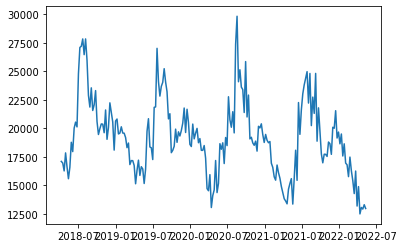

In [30]:
df_clean = df.interpolate(method='linear')
df_clean = df_clean.resample('7D').mean()

plt.plot(df_clean.index, df_clean['Net demand'])
plt.show()

In [48]:
from prophet import Prophet

# use hourly average data as input to forecasting model
hourly = df.resample('H').mean()
ds, y = hourly.index, hourly['Net demand']


hist = pd.DataFrame({'ds': ds, 'y': y})
hist.reset_index(inplace=True)
hist.drop('Timestamp', inplace=True, axis=1)

m = Prophet()
m.fit(hist)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [57]:
future = m.make_future_dataframe(periods=4*8760, freq='H', include_history=True)
forecast = m.predict(future)

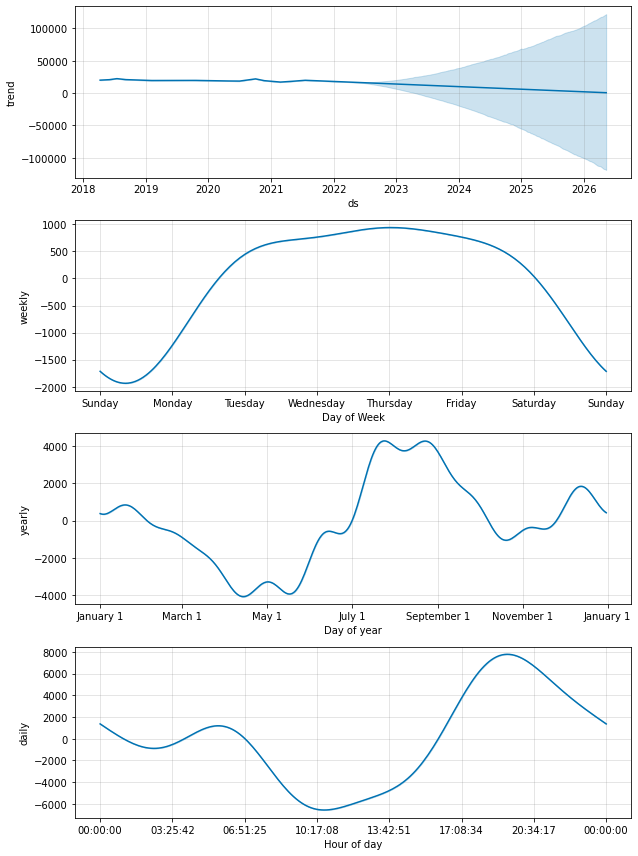

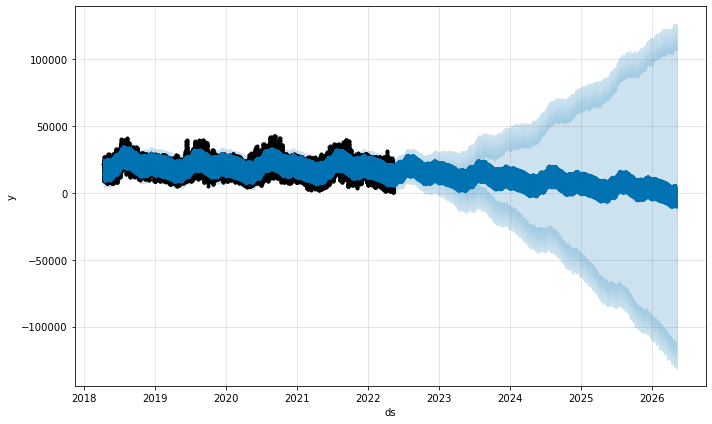

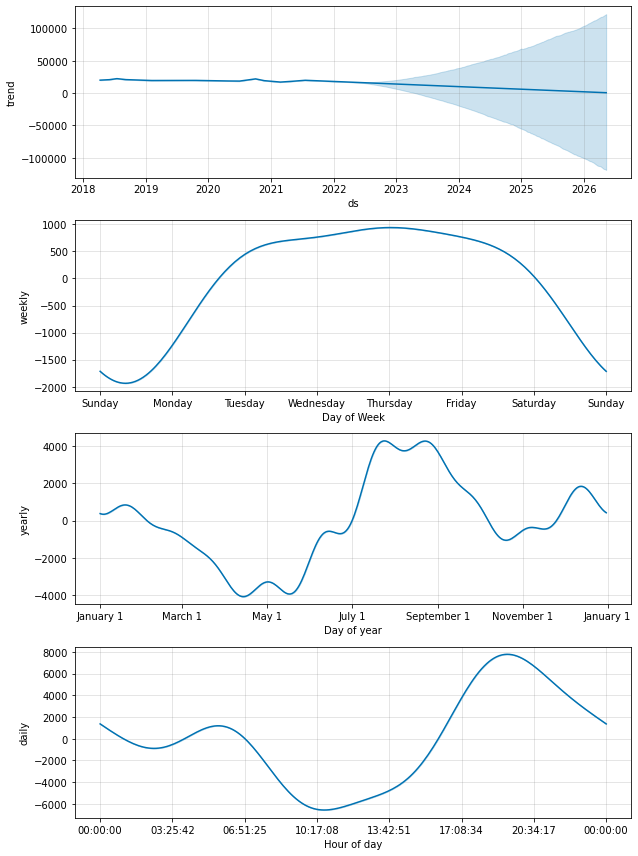

In [61]:
from prophet.plot import plot_plotly, plot_components_plotly


#### restart kernel and make these plots
# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)


m.plot(forecast)
m.plot_components(forecast)